<a href="https://colab.research.google.com/github/muski10/Deep-learning/blob/main/DLactivity5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Reg no - 20MAI0036
#link - https://github.com/muski10

In [ ]:
#LSTM

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

In [3]:

df = pd.read_csv("/content/drive/MyDrive/GOOG.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB
None


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_axis(df['date'], inplace=True)
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)

In [7]:
close_data = df['close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['date'][:split]
date_test = df['date'][split:]

print(len(close_train))
print(len(close_test))

1005
252


In [8]:
look_back = 15

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [10]:
#creating LSTM

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 15
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


50/50 [==============================] - 2s 22ms/step - loss: 915318.9804
Epoch 2/15
50/50 [==============================] - 1s 22ms/step - loss: 750605.7819
Epoch 3/15
50/50 [==============================] - 1s 22ms/step - loss: 684487.6875
Epoch 4/15
50/50 [==============================] - 1s 21ms/step - loss: 605059.9228
Epoch 5/15
50/50 [==============================] - 1s 21ms/step - loss: 535863.1526
Epoch 6/15
50/50 [==============================] - 1s 23ms/step - loss: 400386.5913
Epoch 7/15
50/50 [==============================] - 1s 22ms/step - loss: 250415.7178
Epoch 8/15
50/50 [==============================] - 1s 21ms/step - loss: 123564.4249
Epoch 9/15
50/50 [==============================] - 1s 21ms/step - loss: 42052.7538
Epoch 10/15
50/50 [==============================] - 1s 21ms/step - loss: 8214.0166
Epoch 11/15
50/50 [==============================] - 1s 22ms/step - loss: 754.6629
Epoch 12/15
50/50 [==============================] - 1s 22ms/step - loss: 276.94

In [11]:
#prediction
import plotly.graph_objs as go

prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Google Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [13]:
#forecasting

close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [14]:
trace1 = go.Scatter(
    x = forecast,
    y = forecast_dates,
    mode = 'lines',
    name = 'Data'
)
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [15]:
#RNN

In [16]:
%pylab inline

import math

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['split']
`%matplotlib` prevents importing * from pylab and numpy



In [17]:

sin_wave = np.array([math.sin(x) for x in np.arange(200)])

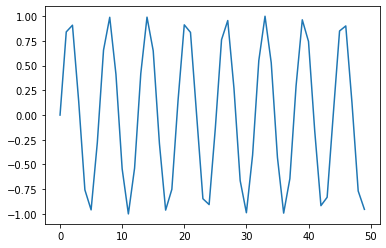

In [18]:
plt.plot(sin_wave[:50])

In [19]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

In [20]:
X.shape, Y.shape

((100, 50, 1), (100, 1))

In [21]:
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

In [22]:
#create archi of RNN
learning_rate = 0.0001    
nepoch = 25               
T = 50                   # length of sequence
hidden_dim = 100         
output_dim = 1

bptt_truncate = 5
min_clip_value = -10
max_clip_value = 10

In [23]:
U = np.random.uniform(0, 1, (hidden_dim, T))
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim))
V = np.random.uniform(0, 1, (output_dim, hidden_dim))

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [25]:
#Check the loss on the training data
for epoch in range(nepoch):
    # check loss on train
    loss = 0.0
    
    # do a forward pass to get prediction
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]                    # get input, output values of each record
        prev_s = np.zeros((hidden_dim, 1))   # here, prev-s is the value of the previous activation of hidden layer; which is initialized as all zeroes
        for t in range(T):
            new_input = np.zeros(x.shape)    # we then do a forward pass for every timestep in the sequence
            new_input[t] = x[t]              # for this, we define a single input for that timestep
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

    # calculate error 
        loss_per_record = (y - mulv)**2 / 2
        loss += loss_per_record
    loss = loss / float(y.shape[0])

In [26]:
# Checking loss on validation data

# check loss on val
val_loss = 0.0
for i in range(Y_val.shape[0]):
    x, y = X_val[i], Y_val[i]
    prev_s = np.zeros((hidden_dim, 1))
    for t in range(T):
        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        mulu = np.dot(U, new_input)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    loss_per_record = (y - mulv)**2 / 2
    val_loss += loss_per_record
val_loss = val_loss / float(y.shape[0])

print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss)

Epoch:  25 , Loss:  [[133485.79379643]] , Val Loss:  [[66740.86426594]]


In [27]:
#Forward Pass

# train model
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    
    layers = []
    prev_s = np.zeros((hidden_dim, 1))
    dU = np.zeros(U.shape)
    dV = np.zeros(V.shape)
    dW = np.zeros(W.shape)
        
    dU_t = np.zeros(U.shape)
    dV_t = np.zeros(V.shape)
    dW_t = np.zeros(W.shape)
        
    dU_i = np.zeros(U.shape)
    dW_i = np.zeros(W.shape)
        
    # forward pass
    for t in range(T):
        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        mulu = np.dot(U, new_input)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        layers.append({'s':s, 'prev_s':prev_s})
        prev_s = s

In [28]:
#Back propogate error

# derivative of pred
dmulv = (mulv - y)
        
# backward pass
for t in range(T):
    dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
    dsv = np.dot(np.transpose(V), dmulv)
            
    ds = dsv
    dadd = add * (1 - add) * ds
            
    dmulw = dadd * np.ones_like(mulw)

    dprev_s = np.dot(np.transpose(W), dmulw)


    for i in range(t-1, max(-1, t-bptt_truncate-1), -1):
        ds = dsv + dprev_s
        dadd = add * (1 - add) * ds

        dmulw = dadd * np.ones_like(mulw)
        dmulu = dadd * np.ones_like(mulu)

        dW_i = np.dot(W, layers[t]['prev_s'])
        dprev_s = np.dot(np.transpose(W), dmulw)

        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        dU_i = np.dot(U, new_input)
        dx = np.dot(np.transpose(U), dmulu)

        dU_t += dU_i
        dW_t += dW_i
                
    dV += dV_t
    dU += dU_t
    dW += dW_t

In [29]:
#Update Weights

if dU.max() > max_clip_value:
    dU[dU > max_clip_value] = max_clip_value
if dV.max() > max_clip_value:
    dV[dV > max_clip_value] = max_clip_value
if dW.max() > max_clip_value:
    dW[dW > max_clip_value] = max_clip_value
                
            
if dU.min() < min_clip_value:
    dU[dU < min_clip_value] = min_clip_value
if dV.min() < min_clip_value:
    dV[dV < min_clip_value] = min_clip_value
if dW.min() < min_clip_value:
    dW[dW < min_clip_value] = min_clip_value
        
# update
U -= learning_rate * dU
V -= learning_rate * dV
W -= learning_rate * dW

In [30]:
# Train Model

# check loss on val
val_loss = 0.0
for i in range(Y_val.shape[0]):
    x, y = X_val[i], Y_val[i]
    prev_s = np.zeros((hidden_dim, 1))
    for t in range(T):
        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        mulu = np.dot(U, new_input)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

        loss_per_record = (y - mulv)**2 / 2
    val_loss += loss_per_record
val_loss = val_loss / float(y.shape[0])

print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss)

Epoch:  25 , Loss:  [[133485.79379643]] , Val Loss:  [[66482.79578062]]


In [31]:
#prediction
preds = []
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    prev_s = np.zeros((hidden_dim, 1))
    # Forward pass
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)
    
preds = np.array(preds)

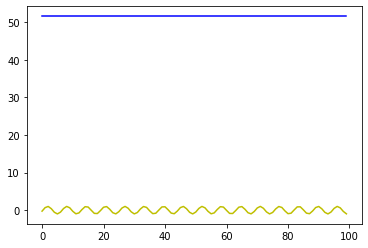

In [32]:
plt.plot(preds[:, 0, 0], 'b')
plt.plot(Y[:, 0], 'y')
plt.show()